In [50]:
import nltk

corpus = ["Muito bom este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [51]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaço = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaço.tokenize(frase)
token_frase


['Muito', 'bom', 'este', 'produto']

In [52]:
from wordcloud import WordCloud
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")
avaliacoes = avaliacoes.drop([
    "original_index", "review_text_processed", "review_text_tokenized", 
    "rating", "kfold_polarity", "kfold_rating"
], axis=1)
avaliacoes.dropna(inplace=True, axis=0)

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

token_por_espaço = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [53]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})

In [54]:
dataframe_frequencia.head()

,Palavra,Frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334


In [55]:
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


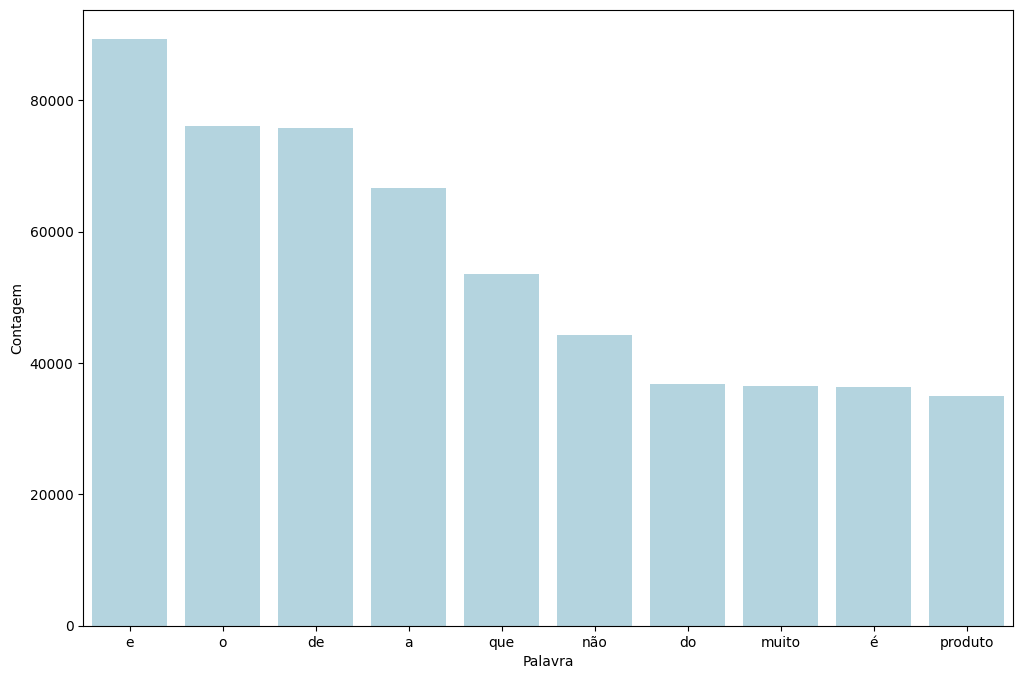

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns = "Frequencia", n = 10),
                 x = "Palavra", y = "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [57]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaço.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = "Frequencia",
                                                       n = quantidade)
 
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dataframe_frequencia,
                  x = "Palavra", y = "Frequencia", color = "lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

In [58]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [59]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords"] = frase_processada

In [60]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


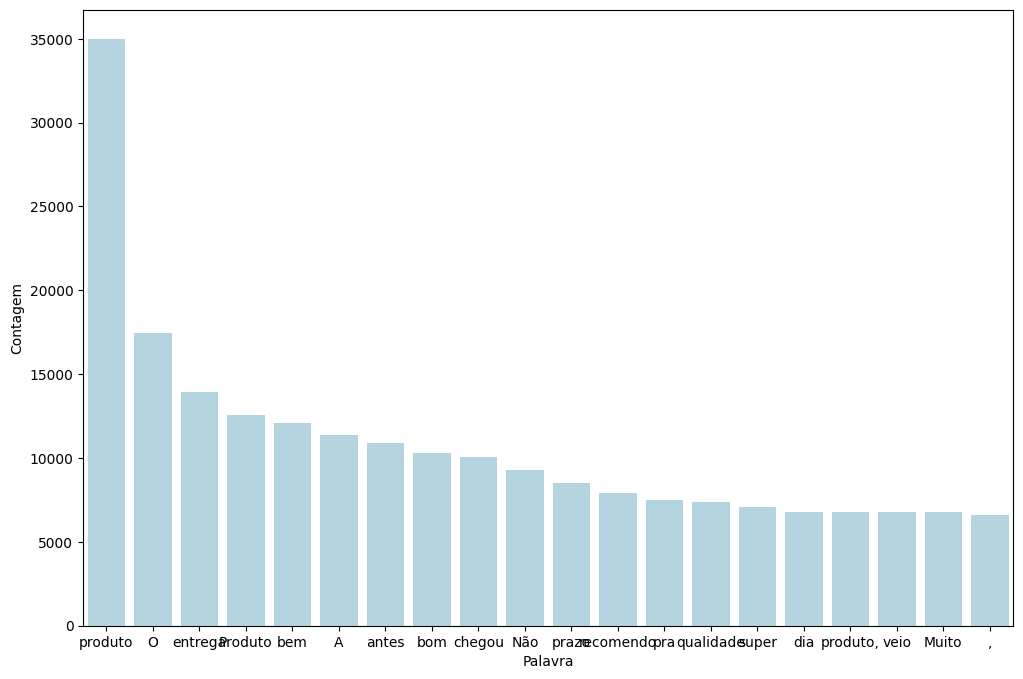

In [61]:
grafico(avaliacoes, "texto_sem_stopwords", 20)

In [62]:
from nltk import tokenize 
frase = "Muito bom este produto"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [63]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [65]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes


frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

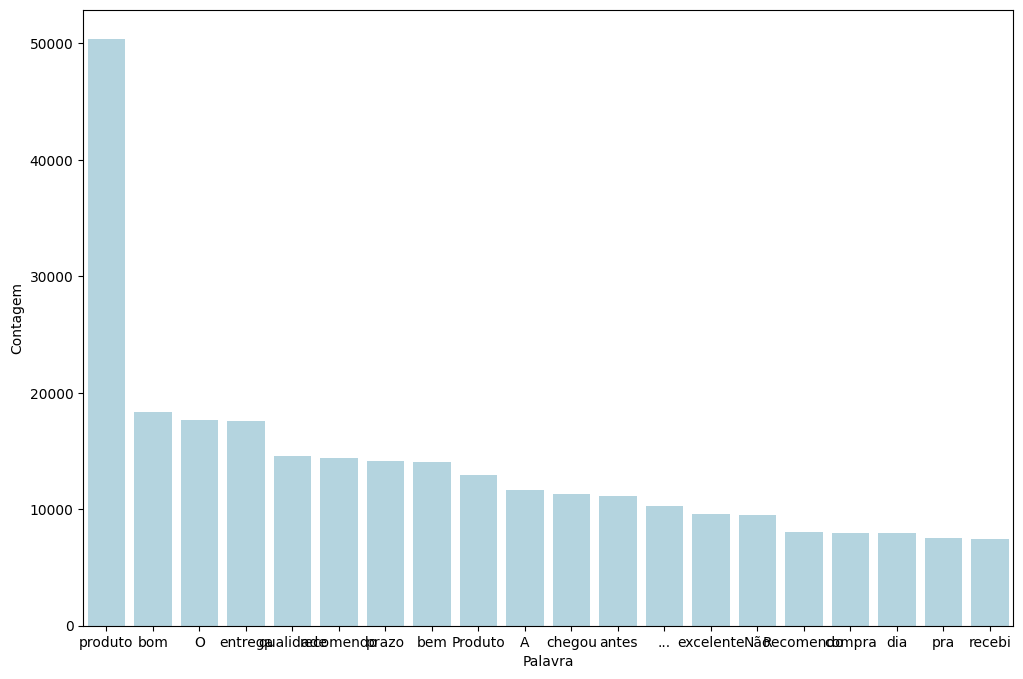

In [66]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 20)

In [67]:
!pip install unidecode

In [68]:
import unidecode

acentos = "Ótimo péssimo não tão é"
unidecode.unidecode(acentos)


'Otimo pessimo nao tao e'

In [69]:

sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]
sem_acentos

['Bem macio felpudo ... recomendo Preco imbativel entrega rapida Compraria outro precisar',
 'Produto excepcional recomendo !!! inovador gostoso ler !!',
 'recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto',
 'Bom custo beneficio Adequado pessoas fazem uso casual aparelho A maquina fotografica excelente A tela fornece imagens otimas Os recursos aparelho faceis manejar',
 'otmo produto atendeu expectativas entrega ocorreu antes previsto bom',
 'GOSTEI MUITO DO PRODUTO TEM OTIMA QUALIDADE E FACILITA MUITO A APLICACAO DO GEL',
 'Adorei entrega prazo produto conforme esperava recomendadissimo',
 'Ja segundo processador deste modelo compro primeiro mae elogios E forte facilita bastante processos',
 'Nao recebi !!! endereco entrega rua augusto hog 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar !!!',
 'Nao compra produto pois veio botoes travados tentar ligar ligou Pessima qualidade',
 'Adorei smartphone excelente ac

In [70]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [71]:
avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = sem_acentos


frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = frase_processada

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                dados[coluna_sentimento],
                                                                stratify=dados[coluna_sentimento],
                                                                random_state = 71)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [73]:
print(treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity"))

0.8824745821127004


In [74]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


In [75]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos]
todas_palavras = ' '.join(todas_avaliacoes)
nuvem_palavras = WordCloud(width=800, height=500,
  max_font_size=110,
  collocations=False).generate(todas_palavras)

In [76]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [77]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

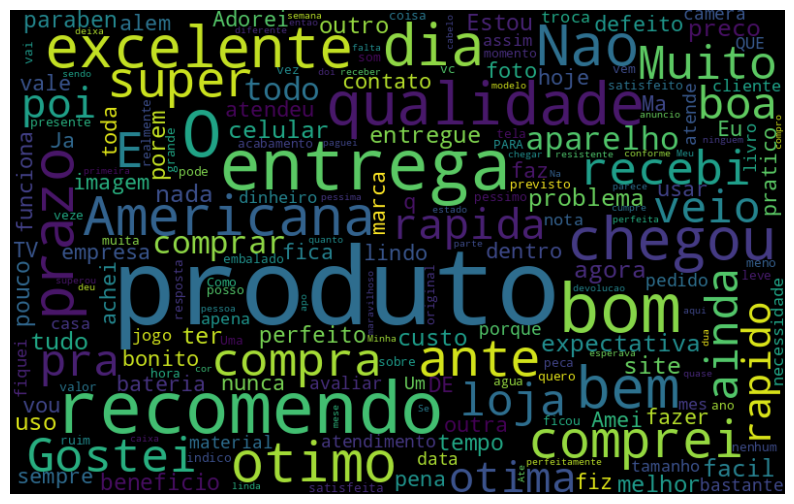

In [78]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

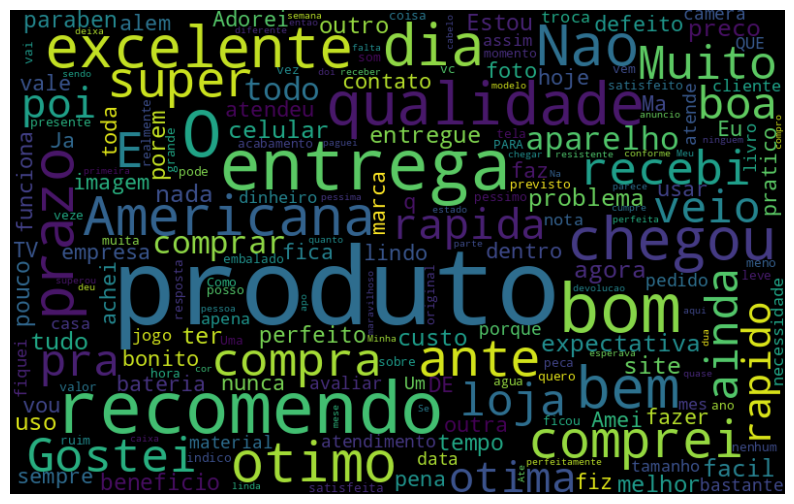

In [79]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

In [83]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos_minusculo"] = frase_processada

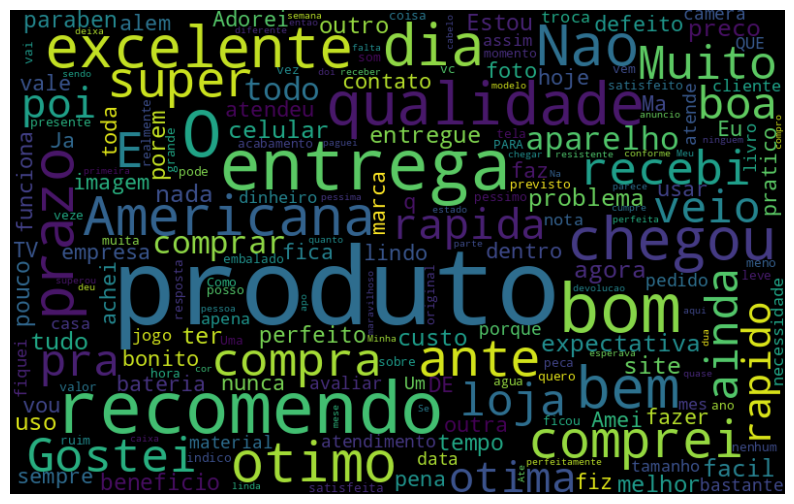

In [81]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

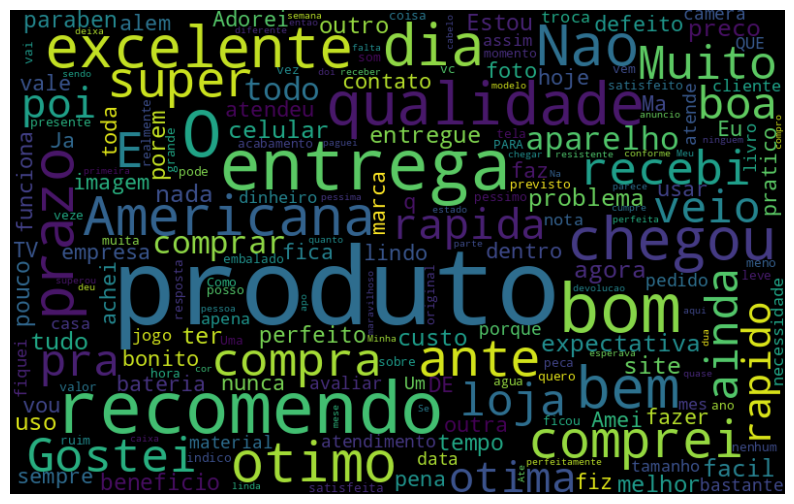

In [82]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")